In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Overlaid Histograms

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
height = Table.read_table('galton.csv').select(1, 2, 7).relabeled(2, 'child')
height.show(6)

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5


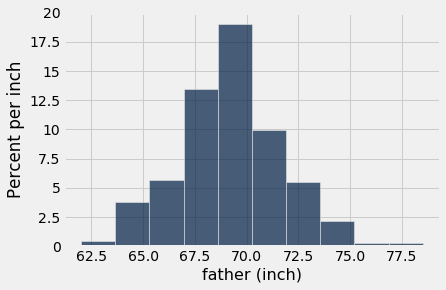

In [3]:
height.hist('father', unit='inch')

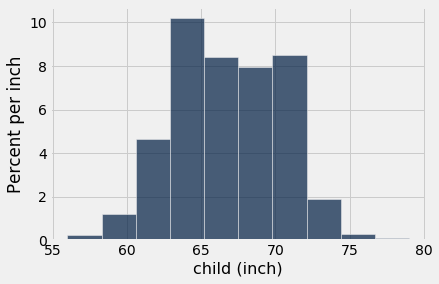

In [4]:
height.hist('child', unit='inch')

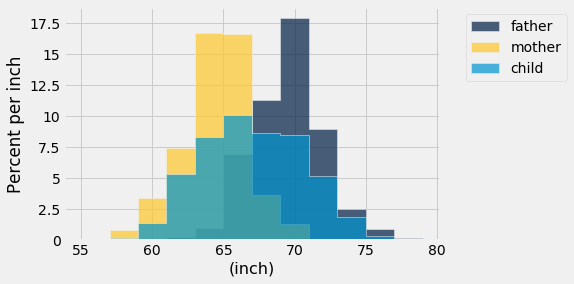

In [5]:
height.hist(unit='inch', bins=np.arange(55, 80, 2))

## Functions

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [6]:
def double(x):
    """ Double x """
    return 2*x

In [7]:
double(3)

6

In [8]:
double(-4)

-8

In [9]:
y = 5
double(y/4)

2.5

In [10]:
y

5

In [11]:
double(y)

10

In [12]:
y

5

In [13]:
z = double(y)

In [14]:
z

10

In [15]:
counts = make_array(1, 2, 3)
total = sum(counts)
np.round((counts/total)*100, 2)

array([16.67, 33.33, 50.  ])

In [16]:
def percents(s):
    """Convert the counts to percents out of the total."""
    total = sum(s)
    return np.round((s/total)*100, 2)

In [17]:
percents(counts)

array([16.67, 33.33, 50.  ])

In [18]:
percents(make_array(1, 1, 1, 1))

array([25., 25., 25., 25.])

In [19]:
counts

array([1, 2, 3])

In [20]:
# percents(2)

In [21]:
# sum(2)

In [22]:
def percents(counts, decimal_places=2):
    """Convert the counts to percents out of the total."""
    total = sum(counts)
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1), "or", percents(parts, decimal_places=1))
print("Rounded to the default number of decimal places:", percents(parts))

Rounded to 1 decimal place: [28.6 14.3 57.1] or [28.6 14.3 57.1]
Rounded to the default number of decimal places: [28.57 14.29 57.14]


## Apply

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [23]:
def cut_off_at_a_billion(x):
    """The smaller of x and 1,000,000,000"""
    return min(x, 1e9)

In [24]:
cut_off_at_a_billion(12)

12

In [25]:
cut_off_at_a_billion(123456)

123456

In [26]:
cut_off_at_a_billion(1234567890)

1000000000.0

In [27]:
top = Table.read_table('top_movies_2017.csv').where('Studio', 'Fox')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
The Empire Strikes Back,Fox,290475067,872825900,1980
Avatar,Fox,760507625,865082100,2009
Return of the Jedi,Fox,309306177,836188200,1983
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
Independence Day,Fox,306169268,615800300,1996
Home Alone,Fox,285761243,602157000,1990
Cleopatra (1963),Fox,57777778,597261000,1963


In [28]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
top.with_column('Adjusted but cut', cut_off)

Title,Studio,Gross,Gross (Adjusted),Year,Adjusted but cut
Star Wars,Fox,460998007,1583483200,1977,1e+09
The Sound of Music,Fox,158671368,1266072700,1965,1e+09
The Empire Strikes Back,Fox,290475067,872825900,1980,8.72826e+08
Avatar,Fox,760507625,865082100,2009,8.65082e+08
Return of the Jedi,Fox,309306177,836188200,1983,8.36188e+08
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999,8.02874e+08
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,6.27259e+08
Independence Day,Fox,306169268,615800300,1996,6.158e+08
Home Alone,Fox,285761243,602157000,1990,6.02157e+08
Cleopatra (1963),Fox,57777778,597261000,1963,5.97261e+08


In [29]:
cut_off_at_a_billion

<function __main__.cut_off_at_a_billion(x)>

In [30]:
type(cut_off_at_a_billion)

function

In [31]:
help(cut_off_at_a_billion)

Help on function cut_off_at_a_billion in module __main__:

cut_off_at_a_billion(x)
    The smaller of x and 1,000,000,000



## Prediction

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [33]:
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


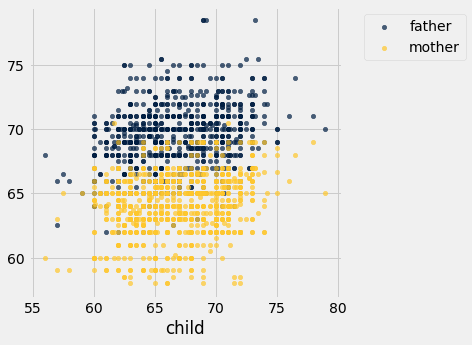

In [34]:
height.scatter(2)

In [35]:
height = height.with_column(
    'parent average', (height.column('mother') + height.column('father')) / 2
)
height

father,mother,child,parent average
78.5,67,73.2,72.75
78.5,67,69.2,72.75
78.5,67,69,72.75
78.5,67,69,72.75
75.5,66.5,73.5,71
75.5,66.5,72.5,71
75.5,66.5,65.5,71
75.5,66.5,65.5,71
75,64,71,69.5
75,64,68,69.5


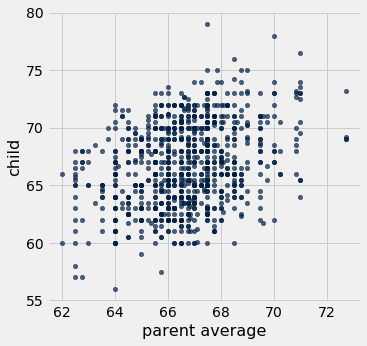

In [36]:
height.scatter('parent average', 'child')

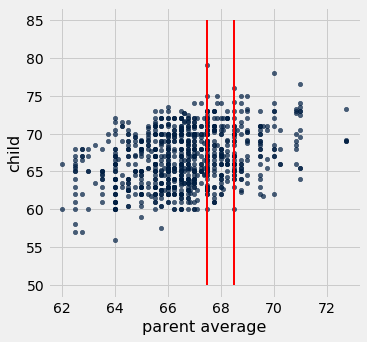

In [37]:
height.scatter('parent average', 'child')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [38]:
close_to_68 = height.where('parent average', are.between(67.5, 68.5))
close_to_68

father,mother,child,parent average
74,62,74,68
74,62,70,68
74,62,68,68
74,62,67,68
74,62,67,68
74,62,66,68
74,62,63.5,68
74,62,63,68
74,61,65,67.5
73.2,63,62.7,68.1


In [39]:
close_to_68.column('child').mean()

67.62

In [40]:
def predict_child(pa):
    close_points = height.where('parent average', are.between(pa - 0.5, pa + 0.5))
    return close_points.column('child').mean()                       

In [41]:
predict_child(68)

67.62

In [42]:
predict_child(62)

63.0

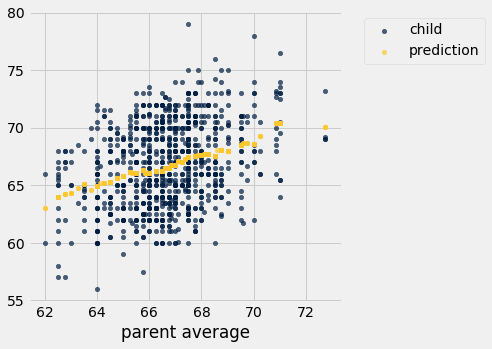

In [43]:
# Apply predict_child to all the midparent heights

height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
).select(2, 3, 4).scatter('parent average')